In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression                                                 #Changed to Logistic Regression
from sklearn.tree import DecisionTreeClassifier                                                     #Changed to Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier                                                 #Changed to Random Forest Classifier
from sklearn.svm import SVC                                                                         #Changed to Support Vector Classifier
from sklearn.metrics import mean_squared_error, r2_score, roc_curve, auc                            #Added roc_curve and auc
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('/content/drive/MyDrive/car_price_dataset.csv')

###1- Basic Exploration of data
* 1.1 Checking the top 5 rows
* 1.2 Checking the shape of dataset
* 1.3 Checking the info of dataset

In [3]:
print(df.head())

        Brand   Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia     Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet  Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes     GLA  2020          4.2    Diesel       Automatic   231440   
3        Audi      Q5  2023          2.0  Electric          Manual   160971   
4  Volkswagen    Golf  2003          2.6    Hybrid  Semi-Automatic   286618   

   Doors  Owner_Count  Price  
0      3            5   8501  
1      2            3  12092  
2      4            2  11171  
3      2            1  11780  
4      3            3   2867  


In [4]:
df.tail()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084
9999,Volkswagen,Tiguan,2001,2.1,Diesel,Manual,157882,3,3,3342


In [5]:
df.shape

(10000, 10)

##2-Exploratory Data Analysis (EDA)
* 2.1 Checking the duplicate rows and fetching them
* 2.2 Checking Null Values (columnwise, percentage wise in columns and row-wise
* 2.3 Outliers Analysis
* 2.4 Univariate Analysis
* 2.5 Bivariate Analysis

In [6]:
#Fetching duplicate rows
df[df.duplicated()]

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price


In [7]:
#Column Wise Null values
df.isnull().sum()

,0
Brand,0
Model,0
Year,0
Engine_Size,0
Fuel_Type,0
Transmission,0
Mileage,0
Doors,0
Owner_Count,0
Price,0


In [8]:
#Column Wise Null Values in percentage
df.isnull().sum()/len(df)*100

,0
Brand,0.0
Model,0.0
Year,0.0
Engine_Size,0.0
Fuel_Type,0.0
Transmission,0.0
Mileage,0.0
Doors,0.0
Owner_Count,0.0
Price,0.0


In [9]:
#Row Wise Null Values
df.isnull().sum(axis=1).sort_values(ascending=False)

,0
9999,0
0,0
1,0
2,0
3,0
...,...
19,0
20,0
21,0
22,0


In [10]:
#Columns and their datatypes
df.dtypes

,0
Brand,object
Model,object
Year,int64
Engine_Size,float64
Fuel_Type,object
Transmission,object
Mileage,int64
Doors,int64
Owner_Count,int64
Price,int64


## 2.3 Outliers Analysis
* 2.3.1 Visualizing outliers
* 2.3.2 Finding the no. of outliers in each column

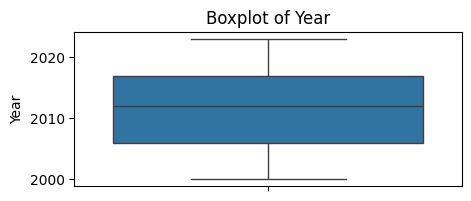

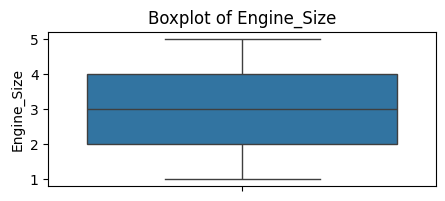

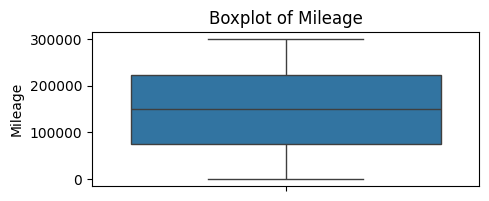

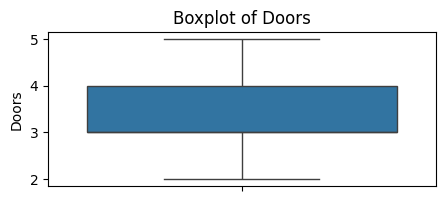

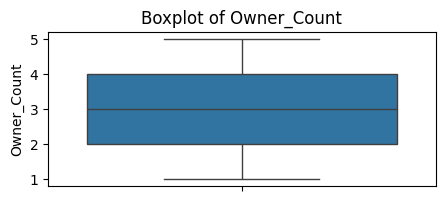

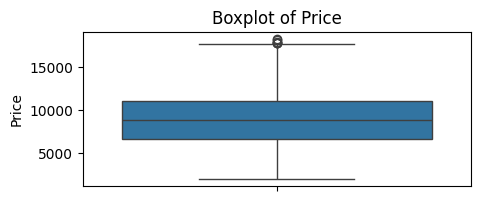

In [11]:
# Check numeric variables
cat_variables = df.select_dtypes('object')
num_variables = df.select_dtypes(['int', 'float'])

# Plotting boxplots for numeric variables with non-constant data
for i in num_variables.columns:
    # Drop NaNs
    data_no_na = df[i].dropna()

    # Check if there’s variation
    if data_no_na.nunique() > 1:
        plt.figure(figsize=(5,2))
        sns.boxplot(y=data_no_na)
        plt.title(f'Boxplot of {i}')
        plt.show()
    else:
        print(f"Skipped {i} (no variation or all NaN)")

##Only outlier spotted was in price vc price graph else no outlier spotted in any price vs {dataset_parameter} parameter|

In [12]:
#Outliers in each column
for i in num_variables:
    Q1= np.quantile(df[i],0.25)
    Q3= np.quantile(df[i],0.75)
    IQR= Q3-Q1
    lower_limit= Q1- 1.5*IQR
    upper_limit= Q3+ 1.5*IQR
    print("Number of ouliers in ",i,":", len(df[df[i]>upper_limit]))
    print('-----------------------')

Number of ouliers in  Year : 0
-----------------------
Number of ouliers in  Engine_Size : 0
-----------------------
Number of ouliers in  Mileage : 0
-----------------------
Number of ouliers in  Doors : 0
-----------------------
Number of ouliers in  Owner_Count : 0
-----------------------
Number of ouliers in  Price : 6
-----------------------


In [13]:
# Calculate IQR for Price
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find rows where Price is an outlier
outliers_df = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]

# Display the outlier rows
print(outliers_df)


        Brand     Model  Year  Engine_Size Fuel_Type Transmission  Mileage  \
1012     Ford  Explorer  2020          4.8  Electric    Automatic    19112   
1100   Toyota   Corolla  2021          4.7  Electric    Automatic    14924   
5698    Honda      CR-V  2023          4.6    Hybrid    Automatic    10046   
7221     Audi        A3  2023          5.0    Hybrid    Automatic    12234   
8422  Hyundai   Elantra  2019          4.6  Electric    Automatic     1406   
9564    Honda    Accord  2022          4.0  Electric    Automatic    14658   

      Doors  Owner_Count  Price  
1012      4            5  18017  
1100      5            3  18301  
5698      4            4  17899  
7221      5            5  18255  
8422      5            3  17871  
9564      4            2  17906  


###Since there are only 6 outliers in the entire dataset (in price column) so we can neglect/ignore these outliers as they contribute almost nil to the prediction since there impact would be way less in prediction and model building

## 2.4 Univariate Analysis

#### 2.4.1. Categorical variables vizual analysis:

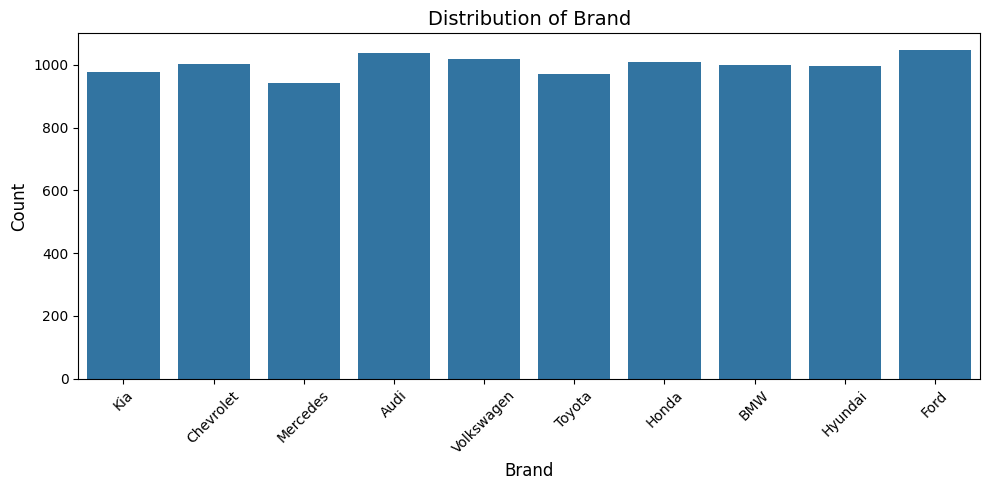

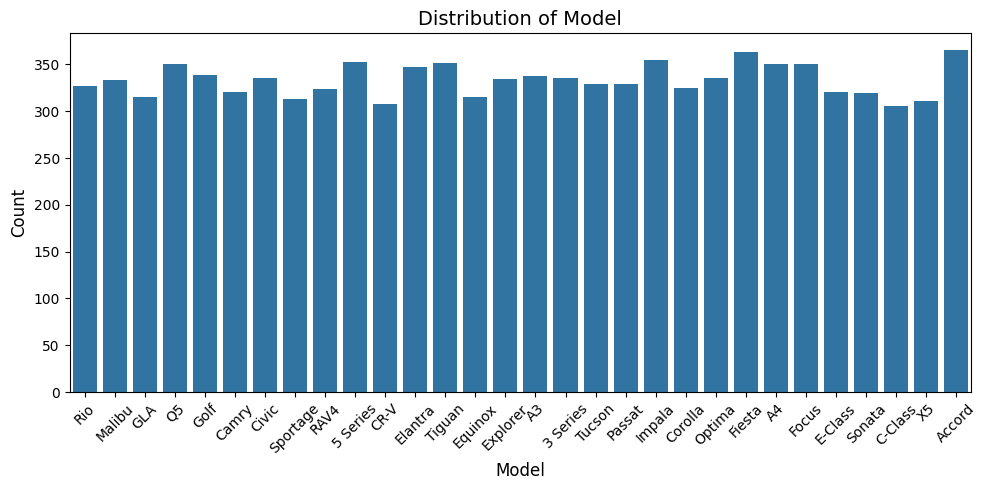

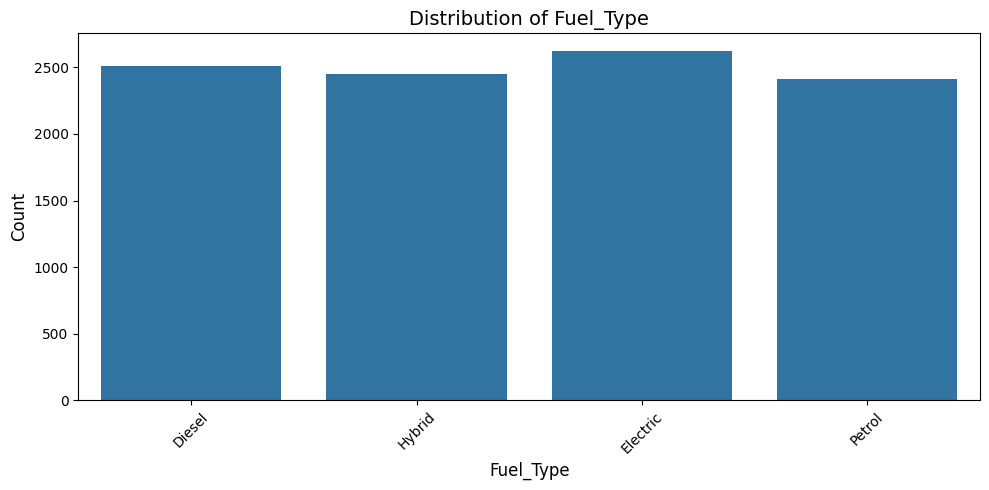

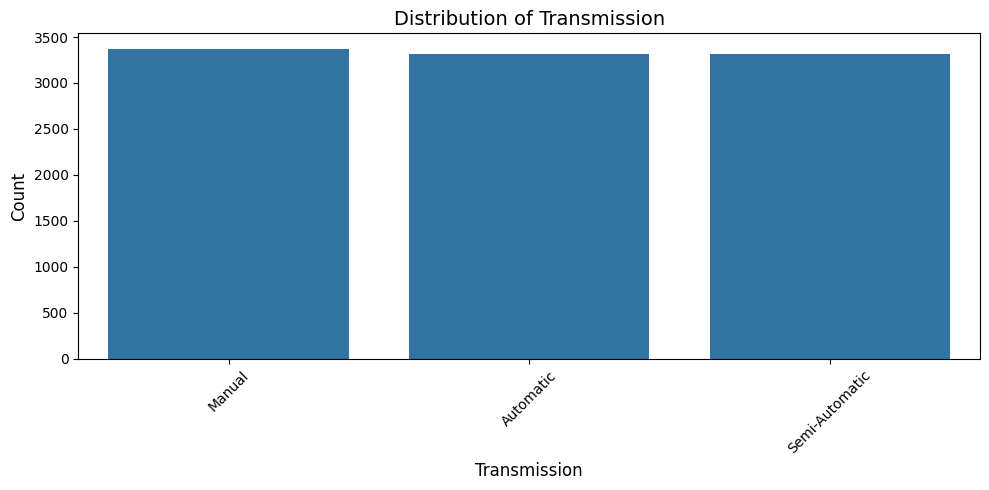

In [14]:
for i in cat_variables.columns:
    plt.figure(figsize=(10, 5))  # Wider and taller figure
    sns.countplot(data=df, x=i)
    plt.xticks(rotation=45)      # Rotate x-axis labels for clarity
    plt.title(f'Distribution of {i}', fontsize=14)
    plt.xlabel(i, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.tight_layout()           # Prevents clipping
    plt.show()

### 2.4.2. Categorical variables numerical analysis:

In [15]:
for i in cat_variables.columns:
    print(df[i].nunique())
    print(df[i].value_counts())
    print('-------------')

10
Brand
Ford          1048
Audi          1038
Volkswagen    1020
Honda         1009
Chevrolet     1003
BMW            999
Hyundai        995
Kia            976
Toyota         970
Mercedes       942
Name: count, dtype: int64
-------------
30
Model
Accord      365
Fiesta      363
Impala      355
5 Series    353
Tiguan      352
Focus       351
Q5          350
A4          350
Elantra     347
Golf        339
A3          338
Optima      336
Civic       336
3 Series    335
Explorer    334
Malibu      333
Passat      329
Tucson      329
Rio         327
Corolla     325
RAV4        324
Camry       321
E-Class     321
Sonata      319
Equinox     315
GLA         315
Sportage    313
X5          311
CR-V        308
C-Class     306
Name: count, dtype: int64
-------------
4
Fuel_Type
Electric    2625
Diesel      2512
Hybrid      2453
Petrol      2410
Name: count, dtype: int64
-------------
3
Transmission
Manual            3372
Automatic         3317
Semi-Automatic    3311
Name: count, dtype: int64
--

###The dataset's categorical features are clean and well-distributed. Model has high cardinality (30 unique values), which may require careful encoding. All other features like Brand, Fuel_Type, and Transmission are balanced and modeling-ready.

###Numerical Variable Analysis

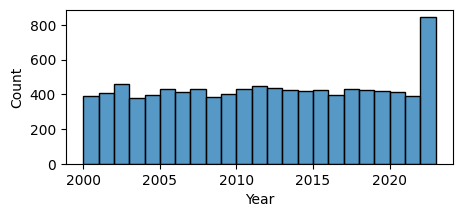

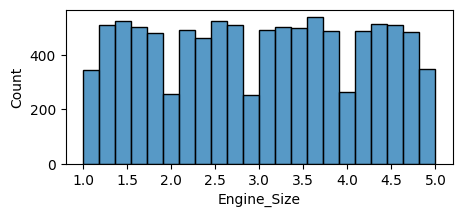

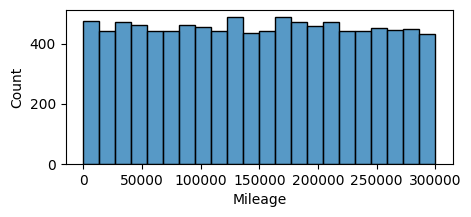

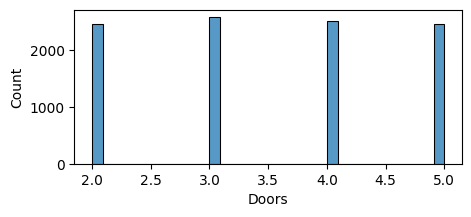

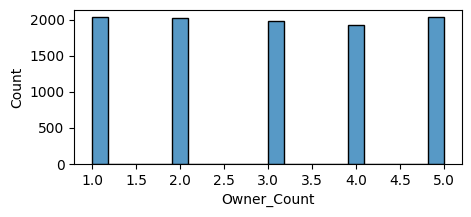

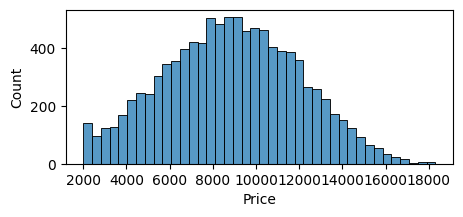

In [16]:
for i in num_variables:
    plt.figure(figsize=(5,2))
    sns.histplot(data=df,x=i);

### In 2020 the car counts spiked as compared to other year counts
* The count also spiked between the price of 8000-12000 and massively decreased after 12000 showing that people are more interested in buying cars of having price range between 8000-12000

####  2.5.1. Relationship of  'Price' with Categorical features
* Few plots which we can use are:
    * Boxplot
    * Scatterplot
    * Barplot
    * Pointplot

### 2.5.1.1. Numerical analysis:

In [17]:
for i in cat_variables.columns:
    print(i)
    print(df.groupby(i)['Price'].mean())
    print('--------------------')

Brand
Brand
Audi          8929.373796
BMW           8704.068068
Chevrolet     9015.683948
Ford          8852.570611
Honda         8665.596630
Hyundai       8778.279397
Kia           8880.086066
Mercedes      8980.087049
Toyota        8798.184536
Volkswagen    8928.377451
Name: Price, dtype: float64
--------------------
Model
Model
3 Series    8854.752239
5 Series    8669.218130
A3          8912.316568
A4          8919.962857
Accord      8743.761644
C-Class     8921.660131
CR-V        8734.714286
Camry       8712.420561
Civic       8517.327381
Corolla     8996.618462
E-Class     8967.330218
Elantra     8802.475504
Equinox     9156.320635
Explorer    8804.895210
Fiesta      8971.077135
Focus       8775.378917
GLA         9049.844444
Golf        8765.235988
Impala      9001.115493
Malibu      8898.180180
Optima      8996.318452
Passat      8914.072948
Q5          8955.257143
RAV4        8684.108025
Rio         8772.571865
Sonata      8740.830721
Sportage    8867.635783
Tiguan      9098.86

#### 2.5.1.2. Visual analysis:

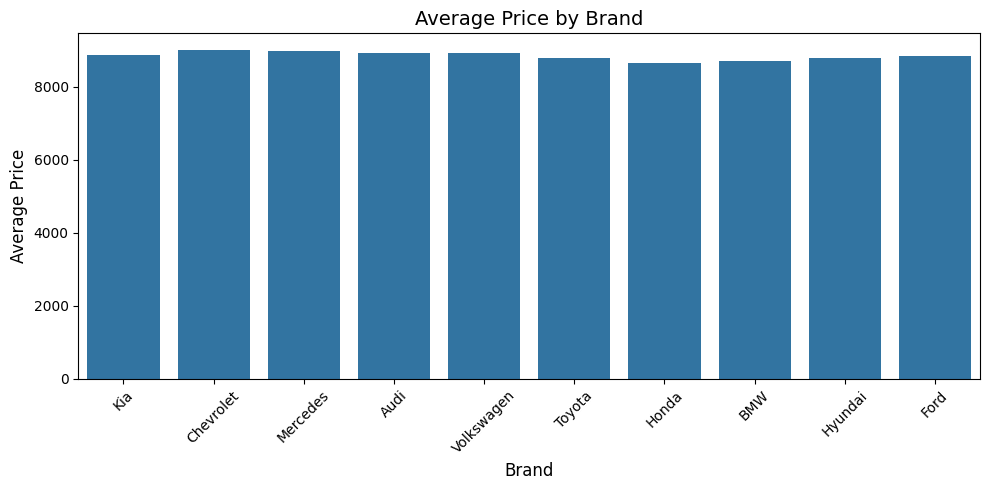

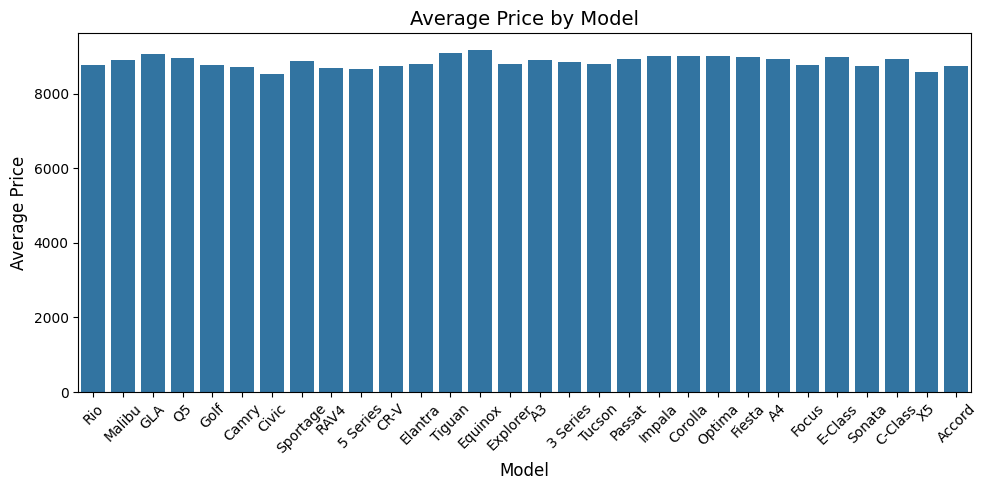

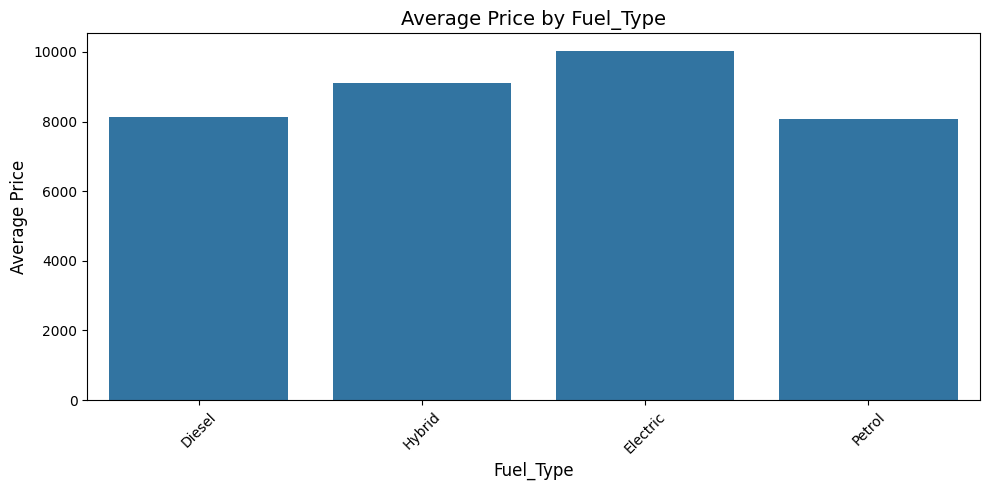

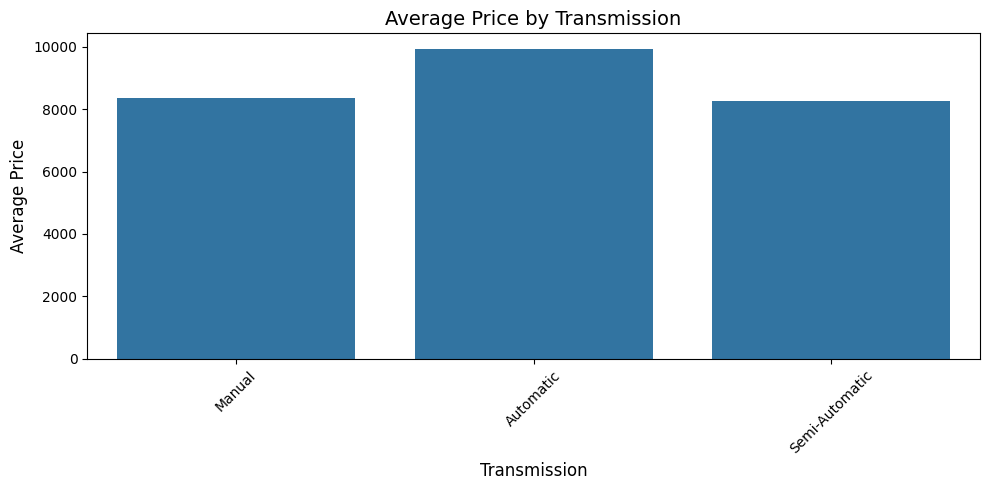

In [18]:
# Barplots of Price vs all categorical variables with rotated x-axis labels
for i in cat_variables.columns:
    plt.figure(figsize=(10, 5))  # Larger figure for better clarity
    sns.barplot(data=df, y='Price', x=i, errorbar=None)
    plt.xticks(rotation=45)     # Rotate labels for readability
    plt.title(f'Average Price by {i}', fontsize=14)
    plt.xlabel(i, fontsize=12)
    plt.ylabel('Average Price', fontsize=12)
    plt.tight_layout()
    plt.show()

###  2.5.2. Relationship of  'Price' with other numerical features
* Few plots which we can use are:
  * Pairplot
  * Jointplot
  * scatterplot

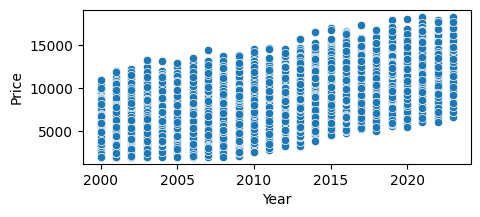

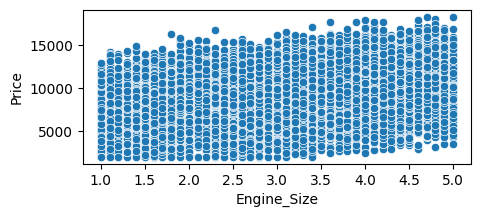

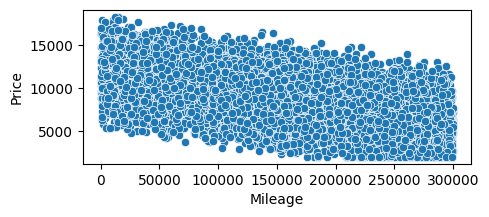

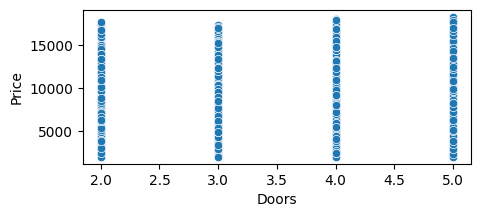

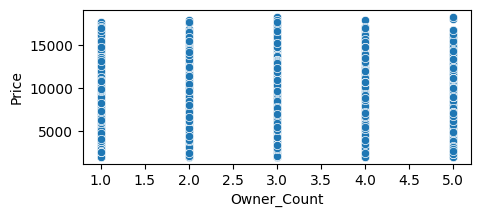

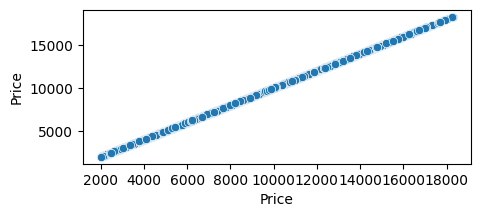

In [19]:
for i in num_variables.columns:
    plt.figure(figsize=(5,2))
    sns.scatterplot(data=df, y='Price',x=i);

### 1.Year vs Price: Likely shows a positive correlation — newer cars tend to have higher prices.

2. Mileage vs Price: Expected negative correlation — higher mileage usually leads to lower prices.

3. Engine_Size vs Price: Possibly a mild positive trend — bigger engines may be associated with more expensive models.

4. Doors and Owner_Count vs Price: Likely no strong correlation — these are discrete features and may not influence price significantly.

### Checking the correlation with heatmap to check above observation:

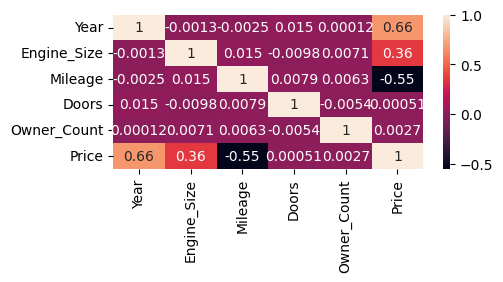

In [20]:
corr= num_variables.corr()
plt.figure(figsize=(5,2))
sns.heatmap(corr,annot=True);

####The code generates a heatmap showing correlation between numerical variables. It visually confirms relationships such as a positive correlation between Year and Price and a negative correlation between Mileage and Price. This helps validate insights from earlier scatterplots.

# 3- Data Cleaning & pre processing
* 1.Dropping duplicate rows
* 2.Replacing wrong entries
* 3.Missing values imputation (SimpleImputer, fillna())
* 4.Handle outliers (IQR, Z-score method)
* 5.Encoding
* 6.Data splitting
* 7.Feature scaling: StandardScaler, MinMaxScaler
* 8.Feature selection:Based on correlation, domain knowledge, or model-based methods


In [21]:
df_copy= df.copy()
cat_variables= df_copy.select_dtypes('object')
num_variables= df_copy.select_dtypes(['int','float'])

#### 3.1 Dropping Duplicates

In [22]:
print(" No. of rows before dropping duplicates :", df_copy.shape[0])
df_copy.drop_duplicates(inplace=True)
print(" No. of rows after dropping duplicates :", df_copy.shape[0])

 No. of rows before dropping duplicates : 10000
 No. of rows after dropping duplicates : 10000


In [23]:
df.isnull().sum()

,0
Brand,0
Model,0
Year,0
Engine_Size,0
Fuel_Type,0
Transmission,0
Mileage,0
Doors,0
Owner_Count,0
Price,0


In [24]:
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [25]:
df_copy.to_csv('df_copy1.csv', index=False)

In [26]:

df_copy2= pd.read_csv('df_copy1.csv')

#Outlier Treatment

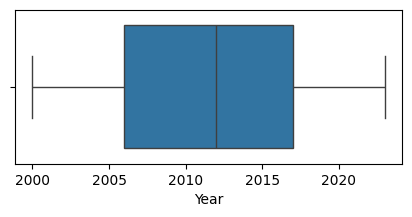

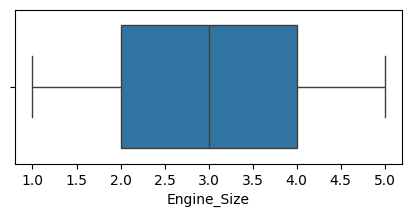

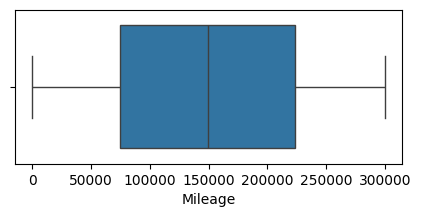

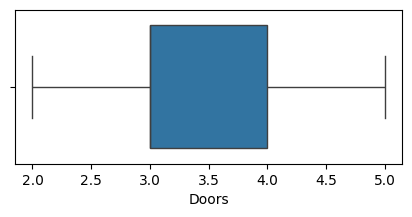

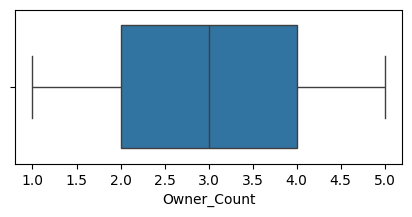

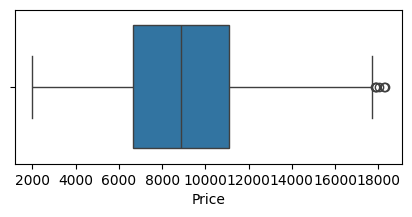

In [27]:
for i in df_copy2.select_dtypes(['int','float']).columns:
    plt.figure(figsize=(5,2))
    sns.boxplot(data=df_copy2,x=i);

In [28]:
# A.IQR Method (Interquartile Range)
Q1 = df_copy2['Price'].quantile(0.25)
Q3 = df_copy2['Price'].quantile(0.75)
IQR = Q3 - Q1
# Define bounds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
lower,upper

(np.float64(-14.75), np.float64(17747.25))

In [29]:
# Filter out outliers
df_copy2[(df_copy2['Price'] <= lower) | (df_copy2['Price'] >= upper)]

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
1012,Ford,Explorer,2020,4.8,Electric,Automatic,19112,4,5,18017
1100,Toyota,Corolla,2021,4.7,Electric,Automatic,14924,5,3,18301
5698,Honda,CR-V,2023,4.6,Hybrid,Automatic,10046,4,4,17899
7221,Audi,A3,2023,5.0,Hybrid,Automatic,12234,5,5,18255
8422,Hyundai,Elantra,2019,4.6,Electric,Automatic,1406,5,3,17871
9564,Honda,Accord,2022,4.0,Electric,Automatic,14658,4,2,17906


In [30]:
df_copy2['Price'].quantile(0.99)

np.float64(15745.080000000002)

In [31]:
df_copy2['Price'].describe()

,Price
count,10000.00000
mean,8852.96440
std,3112.59681
min,2000.00000
25%,6646.00000
50%,8858.50000
75%,11086.50000
max,18301.00000


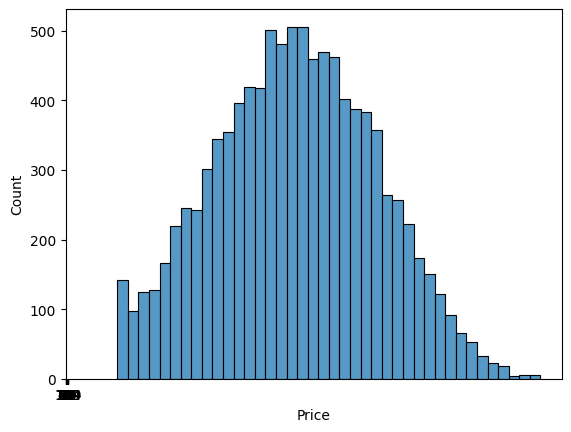

In [32]:
sns.histplot(data=df_copy2, x='Price')
plt.xticks(np.arange(14,120,5));

In [33]:
df_copy2['Price'] =np.where(df_copy2['Price']<= lower,df_copy2['Price'].median(),df_copy2['Price'])
df_copy2['Price'] =np.where(df_copy2['Price']>= upper,df_copy2['Price'].median(),df_copy2['Price'])

In [34]:
 df_copy2[(df_copy2['Price'] <= lower) | (df_copy2['Price'] >= upper)]

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price


In [35]:
df_copy2['Price'].describe()

,Price
count,10000.000000
mean,8847.454600
std,3104.440023
min,2000.000000
25%,6646.000000
50%,8858.250000
75%,11080.250000
max,17719.000000


In [36]:
df_copy2['Price'].quantile(0.99)

np.float64(15682.100000000002)

In [37]:
# B. Z-Score Method
from scipy.stats import zscore
df_copy2['zscore'] = zscore(df_copy2['Price'])
df_copy2[df_copy2['zscore'].abs() > 3]

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,zscore


<Axes: xlabel='Price', ylabel='Count'>

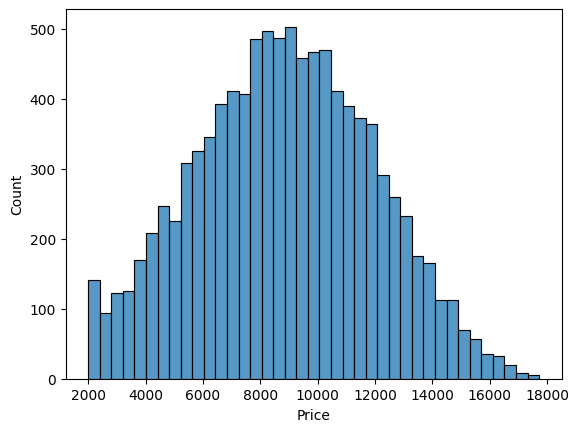

In [38]:
sns.histplot(data=df_copy2, x='Price')
#plt.xticks(np.arange(58,680000,1000));

In [39]:
df_copy2['Price'] =np.where(df_copy2['zscore'].abs()>3,df_copy2['Price'].median(),df_copy2['Price'])

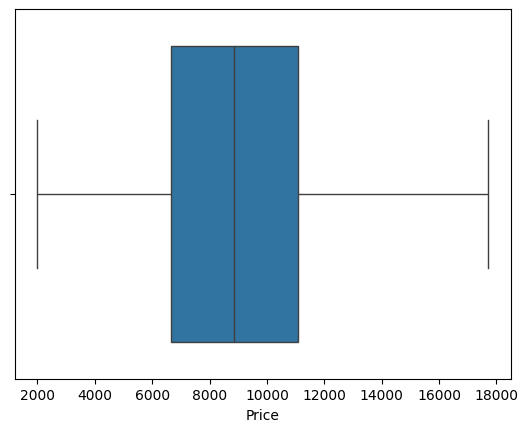

In [40]:
sns.boxplot(data=df_copy2, x='Price');

# 3.5 Encoding

Encoding is the process of converting categorical variables (text labels or categories) into a numerical format, so they can be used in machine learning models (which require numerical input).

Types of Categorical Variables
* Nominal – No natural order. E.g., Gender, Color, Country
* Ordinal – Has a meaningful order. E.g., Size (Small < Medium < Large), Rating (Low < Medium < High)

In [41]:
df_copy2.to_csv('df_copy3.csv', index=False)
df_3 = pd.read_csv('df_copy3.csv')

In [42]:
df_3.head(3)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,zscore
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501.0,-0.111605
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092.0,1.045183
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171.0,0.748496


In [43]:
cat_variables= df_3.select_dtypes('object')
num_variables= df_3.select_dtypes(['int','float'])

In [44]:
#Shows the column names with categorical datatype
cat_variables.columns

Index(['Brand', 'Model', 'Fuel_Type', 'Transmission'], dtype='object')

In [45]:
cat_variables.head(3)

,Brand,Model,Fuel_Type,Transmission
0,Kia,Rio,Diesel,Manual
1,Chevrolet,Malibu,Hybrid,Automatic
2,Mercedes,GLA,Diesel,Automatic


###Nominal Encoding:

Brand → Different car brands (e.g., Ford, Audi)

Model → Car model names (e.g., Fiesta, A4)

Fuel_Type → Petrol, Diesel, Electric, etc.

Transmission → Manual, Automatic, etc.

* These are all qualitative labels with no natural ranking.

###Ordinal Encoding:

Owner_Count → 1st, 2nd, 3rd owner… (more owners generally means lower value)

Doors → 2, 3, 4, 5 (more doors = potentially more practical)

* These features have a natural increasing order in their values.

In [46]:
# 2. Nominal encoding
nominal_features=['Brand','Model','Fuel_Type','Transmission']
for i in nominal_features:
    print(i,";")
    print(pd.Categorical(cat_variables[i],ordered= False))
    print(pd.Categorical(cat_variables[i],ordered= False).codes)
    print('----------------------------------------')
    cat_variables[i]=pd.Categorical(cat_variables[i],ordered= False).codes

Brand ;
['Kia', 'Chevrolet', 'Mercedes', 'Audi', 'Volkswagen', ..., 'Kia', 'Chevrolet', 'BMW', 'Ford', 'Volkswagen']
Length: 10000
Categories (10, object): ['Audi', 'BMW', 'Chevrolet', 'Ford', ..., 'Kia', 'Mercedes', 'Toyota',
                          'Volkswagen']
[6 2 7 ... 1 3 9]
----------------------------------------
Model ;
['Rio', 'Malibu', 'GLA', 'Q5', 'Golf', ..., 'Optima', 'Impala', '3 Series', 'Explorer', 'Tiguan']
Length: 10000
Categories (30, object): ['3 Series', '5 Series', 'A3', 'A4', ..., 'Sportage', 'Tiguan', 'Tucson', 'X5']
[24 19 16 ...  0 13 27]
----------------------------------------
Fuel_Type ;
['Diesel', 'Hybrid', 'Diesel', 'Electric', 'Hybrid', ..., 'Diesel', 'Electric', 'Petrol', 'Hybrid', 'Diesel']
Length: 10000
Categories (4, object): ['Diesel', 'Electric', 'Hybrid', 'Petrol']
[0 2 0 ... 3 2 0]
----------------------------------------
Transmission ;
['Manual', 'Automatic', 'Automatic', 'Manual', 'Semi-Automatic', ..., 'Semi-Automatic', 'Automatic', 'Autom

In [47]:
cat_variables["Brand"].value_counts()

,count
Brand,
3,1048
0,1038
9,1020
4,1009
2,1003
1,999
5,995
6,976
8,970


In [48]:
df_3["Brand"].value_counts()

,count
Brand,
Ford,1048
Audi,1038
Volkswagen,1020
Honda,1009
Chevrolet,1003
BMW,999
Hyundai,995
Kia,976
Toyota,970


In [49]:
#Since we only have nominal paramters so we can do one-hot encoding to all nominal features to encode them
encoded_nominals = pd.get_dummies(cat_variables[nominal_features], dtype='int')

In [50]:
#Saving the resultant data (encoded one) into another dataframe called df_encoded ensuring it has all values encoded
df_encoded = df_3.drop(columns=nominal_features).join(encoded_nominals)

In [51]:
df_encoded.shape

(10000, 11)

In [52]:
df_encoded.head()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price,zscore,Brand,Model,Fuel_Type,Transmission
0,2020,4.2,289944,3,5,8501.0,-0.111605,6,24,0,1
1,2012,2.0,5356,2,3,12092.0,1.045183,2,19,2,0
2,2020,4.2,231440,4,2,11171.0,0.748496,7,16,0,0
3,2023,2.0,160971,2,1,11780.0,0.944677,0,22,1,1
4,2003,2.6,286618,3,3,2867.0,-1.926516,9,17,2,2


In [53]:
df_encoded.to_csv('df_encoded.csv', index=False)

In [54]:
df_encoded.tail()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price,zscore,Brand,Model,Fuel_Type,Transmission
9995,2004,3.7,5794,2,4,8884.0,0.011773,6,20,0,2
9996,2002,1.4,168000,2,1,6240.0,-0.839953,2,18,1,0
9997,2010,3.0,86664,5,1,9866.0,0.328110,1,0,3,0
9998,2002,1.4,225772,4,1,4084.0,-1.534477,3,13,2,0
9999,2001,2.1,157882,3,3,3342.0,-1.773502,9,27,0,1


# 3.6 Train Test Split (Required when building model for predictions)
## What is train_test_split?
train_test_split is a function from scikit-learn used to split your dataset into two parts:

Training set – to train the model

Validation set – to evaluate the model's performance

## Why is it required?
When building machine learning models, we train the model on one portion of the data and test it on unseen data to check how well it generalizes.

This prevents overfitting and gives a fair estimate of model accuracy.

In [55]:
df_TrainTestSplit= pd.read_csv('df_encoded.csv')

In [56]:
#Checking if there are any null values in our traintestsplit data
df_TrainTestSplit.isnull().sum()

,0
Year,0
Engine_Size,0
Mileage,0
Doors,0
Owner_Count,0
Price,0
zscore,0
Brand,0
Model,0
Fuel_Type,0


In [57]:
df_TrainTestSplit.head()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price,zscore,Brand,Model,Fuel_Type,Transmission
0,2020,4.2,289944,3,5,8501.0,-0.111605,6,24,0,1
1,2012,2.0,5356,2,3,12092.0,1.045183,2,19,2,0
2,2020,4.2,231440,4,2,11171.0,0.748496,7,16,0,0
3,2023,2.0,160971,2,1,11780.0,0.944677,0,22,1,1
4,2003,2.6,286618,3,3,2867.0,-1.926516,9,17,2,2


### Separating Features and Target

In [58]:
X = df_TrainTestSplit.drop(['Price', 'zscore'], axis=1)
y = df_TrainTestSplit['Price']

In [59]:
#Features without target i.e. price
X.head()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Brand,Model,Fuel_Type,Transmission
0,2020,4.2,289944,3,5,6,24,0,1
1,2012,2.0,5356,2,3,2,19,2,0
2,2020,4.2,231440,4,2,7,16,0,0
3,2023,2.0,160971,2,1,0,22,1,1
4,2003,2.6,286618,3,3,9,17,2,2


In [60]:
#The target column (the one whoch we need to predict)
y.head()

,Price
0,8501.0
1,12092.0
2,11171.0
3,11780.0
4,2867.0


In [61]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2,random_state=20)

## 3.7 Scaling
* Why Feature Scaling is Important:

Many machine learning algorithms (like KNN, SVM, Gradient Descent-based models, Neural Networks) compute distances or rely on the magnitude of features. If one feature has a large range and another has a small range, the model might become biased toward the feature with the larger range.

In [62]:
X.dtypes

,0
Year,int64
Engine_Size,float64
Mileage,int64
Doors,int64
Owner_Count,int64
Brand,int64
Model,int64
Fuel_Type,int64
Transmission,int64


In [63]:
cat_cols=['Brand','Model','Fuel_Type','Transmission']
num_cols= ['Year','Engine_Size','Mileage','Doors','Owner_Count']

In [64]:
df_encoded.dtypes

,0
Year,int64
Engine_Size,float64
Mileage,int64
Doors,int64
Owner_Count,int64
Price,float64
zscore,float64
Brand,int8
Model,int8
Fuel_Type,int8


In [65]:
# 1. Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
MMscaler = MinMaxScaler()
Xtrain_scaled_MinMax = MMscaler.fit_transform(X_train[num_cols])
Xval_scaled_MinMax = MMscaler.transform(X_val[num_cols])

In [66]:
Xtrain_scaled_MinMax=pd.DataFrame(Xtrain_scaled_MinMax,columns=X_train[num_cols].columns)
Xval_scaled_MinMax=pd.DataFrame(Xval_scaled_MinMax,columns=X_val[num_cols].columns)

In [67]:
Xtrain_scaled_MinMax.head(2)

,Year,Engine_Size,Mileage,Doors,Owner_Count
0,0.521739,0.500,0.416465,0.333333,0.0
1,0.956522,0.975,0.954692,0.000000,0.5


In [68]:
X_train.head(2)

,Year,Engine_Size,Mileage,Doors,Owner_Count,Brand,Model,Fuel_Type,Transmission
4661,2012,3.0,124932,3,1,4,8,1,0
7168,2022,4.9,286358,2,3,8,9,3,1


In [69]:
Xtrain_scaled_MinMax.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,0.502234,0.501962,0.498618,0.497500,0.497219
std,0.299245,0.287094,0.288076,0.370037,0.355559
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.260870,0.250000,0.250503,0.333333,0.250000
50%,0.521739,0.500000,0.500418,0.333333,0.500000
75%,0.739130,0.750000,0.746760,0.666667,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000


# 4-Model Building (Regression), Evaluation & Tuning

### 4.1 Regression algorithms
    * Linear Regression
    * KNN
    * Decision Trees (CART)
    * Random Forest
    * Boosting
        * Adaboost,
        * Gboost,
        * XGboost
### 4.2 Model Evaluation: Regression metrics: R² & RMSE
1. R-squared (R²) — Coefficient of Determination
    * What it means:
        * Measures how well the model explains the variability in the target variable.
        * Value lies between 0 and 1 (can be negative if model performs worse than the mean).
    * Interpretation:
        * R² = 1 → perfect prediction
        * R² = 0 → model is no better than the average
        * Higher is better
          ![image.png](attachment:e23679fd-3fe1-4ef2-b9e9-1dfed173e585.png)

2. RMSE — Root Mean Squared Error
    * What it means:
        * Measures average prediction error in the same units as the target variable.
        * It gives more weight to larger errors.
    * Interpretation:
        * Lower is better
        * Easy to interpret because it’s in the same unit as
          ![image.png](attachment:65110f95-03fd-4549-be04-631970e6b345.png)
### 4.3 Model Tuning
    * GridSearchCV
    * Hyper Parameter Tuning


In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
#pip install xgboost
from xgboost import XGBRegressor

In [71]:
# loading the encoded data
df_TrainTestSplit= pd.read_csv('df_encoded.csv')

#seperating the target variable from rest of the data
X = df_TrainTestSplit.drop(['Price','zscore'], axis=1)
y = df_TrainTestSplit['Price']

# Splitting the data into train & validation set
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2,random_state=20)



# Use the existing scaled data sets
x_trainFinal= Xtrain_scaled_MinMax
x_valFinal= Xval_scaled_MinMax

In [72]:
df_TrainTestSplit.head()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price,zscore,Brand,Model,Fuel_Type,Transmission
0,2020,4.2,289944,3,5,8501.0,-0.111605,6,24,0,1
1,2012,2.0,5356,2,3,12092.0,1.045183,2,19,2,0
2,2020,4.2,231440,4,2,11171.0,0.748496,7,16,0,0
3,2023,2.0,160971,2,1,11780.0,0.944677,0,22,1,1
4,2003,2.6,286618,3,3,2867.0,-1.926516,9,17,2,2


In [73]:
X.head()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Brand,Model,Fuel_Type,Transmission
0,2020,4.2,289944,3,5,6,24,0,1
1,2012,2.0,5356,2,3,2,19,2,0
2,2020,4.2,231440,4,2,7,16,0,0
3,2023,2.0,160971,2,1,0,22,1,1
4,2003,2.6,286618,3,3,9,17,2,2


In [74]:
# Building a Linear regression model
LR = LinearRegression()
LR.fit(x_trainFinal,y_train)
y_train_pred = LR.predict(x_trainFinal)
y_val_pred = LR.predict(x_valFinal)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)
print("Train RMSE",rmse_train,"| Train R2",r2_train)
print('Test RMSE',rmse_val,'| Test R2',r2_val)

Train RMSE 1111.2714112185733 | Train R2 0.8706802272604852
Test RMSE 1100.2866523768178 | Test R2 0.8787378083997874


In [75]:
# Building a knn model
knn = KNeighborsRegressor()
knn.fit(x_trainFinal,y_train)
y_train_pred = knn.predict(x_trainFinal)
y_val_pred = knn.predict(x_valFinal)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)
print("Train RMSE",rmse_train,"| Train R2",r2_train)
print('Test RMSE',rmse_val,'| Test R2',r2_val)

Train RMSE 1030.9984394077665 | Train R2 0.8886883385707793
Test RMSE 1285.9490358875037 | Test R2 0.834361519296202


In [76]:
#Building various models and comparimg their performances
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor()
}

In [77]:
results = []
for name, model in models.items():
    model.fit(x_trainFinal, y_train)

    # Predictions
    y_train_pred = model.predict(x_trainFinal)
    y_val_pred = model.predict(x_valFinal)

    # Metrics
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)

    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
    r2_val = r2_score(y_val, y_val_pred)

    # Store result
    results.append({
        "Model": name,
        "Train_RMSE": rmse_train,
        "Train_R²": r2_train,
        "Val_RMSE": rmse_val,
        "Val_R²": r2_val
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Show results sorted by Validation RMSE
results_df

,Model,Train_RMSE,Train_R²,Val_RMSE,Val_R²
0,Linear Regression,1111.271411,0.870680,1100.286652,0.878738
1,KNN,1030.998439,0.888688,1285.949036,0.834362
2,Decision Tree,0.000000,1.000000,1618.600713,0.737582
3,Random Forest,444.013785,0.979355,1188.928985,0.858412
4,AdaBoost,1287.216446,0.826489,1318.435834,0.825887
5,Gradient Boosting,1070.156969,0.880072,1120.703976,0.874196
6,XGBoost,745.243207,0.941840,1190.667716,0.857998


In [78]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Instantiate model
gbr = GradientBoostingRegressor(random_state=20)

# Grid Search
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid,
                           cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=2)

# Fit on training data
grid_search.fit(x_trainFinal, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}


In [79]:
# Predict on validation set
y_pred_final = best_model.predict(x_valFinal)

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score
final_rmse = np.sqrt(mean_squared_error(y_val, y_pred_final))
final_r2 = r2_score(y_val, y_pred_final)

print(f"Final RMSE: {final_rmse}")
print(f"Final R² Score: {final_r2}")

Final RMSE: 1120.1466821277745
Final R² Score: 0.8743207681439324


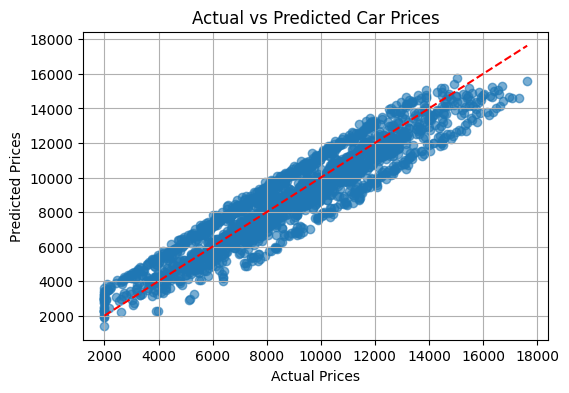

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.scatter(y_val, y_pred_final, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Car Prices")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')  # reference line
plt.grid(True)
plt.show()

In [81]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define hyperparameter space including subsample
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.15],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.7, 0.8, 0.9, 1.0]  # Subsample included here
}

# Initialize base model
gb_model = GradientBoostingRegressor(random_state=42)

# Randomized Search CV
random_search = RandomizedSearchCV(
    gb_model,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    verbose=2,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error'
)

# Fit on training data
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1,
                                                          0.15],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   scoring='neg_root_mean_squared_error', verbose=2)

In [82]:
# Best model after tuning
best_model = random_search.best_estimator_

# Predictions
y_val_pred = best_model.predict(X_val)

# Evaluation Metrics
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)

print(f"Best Parameters: {random_search.best_params_}")
print(f"Validation RMSE: {rmse_val:.2f}")
print(f"Validation R²: {r2_val:.4f}")

Best Parameters: {'subsample': 0.8, 'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 6, 'learning_rate': 0.05}
Validation RMSE: 196.72
Validation R²: 0.9961


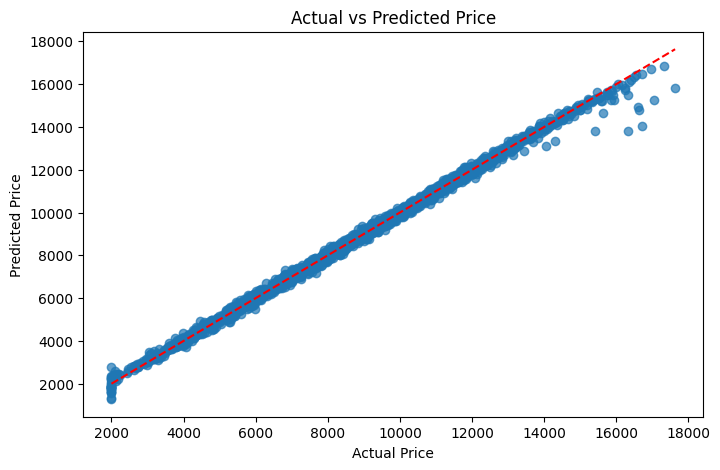

In [83]:
# Plot Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_val, y_val_pred, alpha=0.7)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

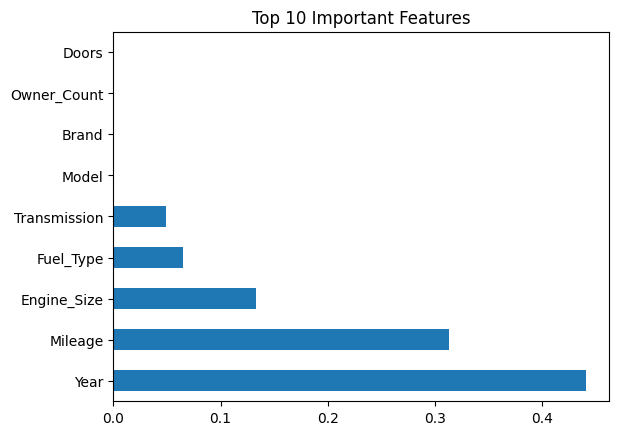

In [84]:
# Feature Importances
feat_importance = pd.Series(best_model.feature_importances_, index=X_train.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

# 4-Model Building (Classification), Evaluation & Tuning
### 4.1 Classification Algorithms
* Logistic Regression

* K-Nearest Neighbors (KNN)

* Decision Trees (CART)

* Random Forest

* Boosting:

* AdaBoost

* Gradient Boosting (GBoost)

* XGBoost

###4.2 Model Evaluation: Classification Metrics
1. Accuracy

Measures overall correctness: (TP + TN) / Total

Good for balanced datasets

Higher is better

2. Precision

Correct positive predictions out of all predicted positives: TP / (TP + FP)

Important when false positives are costly

Higher is better

3. Recall

Correct positive predictions out of all actual positives: TP / (TP + FN)

Important when false negatives are costly

Higher is better

4. F1-Score

Harmonic mean of Precision and Recall

Useful with imbalanced classes

Higher is better

5. Confusion Matrix

Table showing TP, TN, FP, FN

Helps visualize prediction performance

6. ROC Curve & AUC

ROC: Plot of Recall vs False Positive Rate

AUC: Area under the ROC curve

Higher AUC means better model

### 4.3 Model Tuning
GridSearchCV: Tests all combinations of parameters

RandomizedSearchCV: Tests random combinations

Used to optimize hyperparameters like n_neighbors, max_depth, n_estimators, etc.

In [85]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
#pip install xgboost
from xgboost import XGBClassifier

In [86]:
df_3= pd.read_csv('df_copy3.csv')

In [87]:
df_3

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,zscore
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501.0,-0.111605
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092.0,1.045183
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171.0,0.748496
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780.0,0.944677
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867.0,-1.926516
...,...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884.0,0.011773
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240.0,-0.839953
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866.0,0.328110
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084.0,-1.534477


In [88]:
cat_variables= df_3.select_dtypes('object')
num_variables= df_3.select_dtypes(['int','float'])

In [89]:
from sklearn.preprocessing import LabelEncoder

df_label_encoded = df_3.copy()

# Identify all categorical columns
cat_columns = df_label_encoded.select_dtypes(include='object').columns

# Apply Label Encoding to each categorical column
le = LabelEncoder()
for col in cat_columns:
    df_label_encoded[col] = le.fit_transform(df_label_encoded[col])

df_label_encoded.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,zscore
0,6,24,2020,4.2,0,1,289944,3,5,8501.0,-0.111605
1,2,19,2012,2.0,2,0,5356,2,3,12092.0,1.045183
2,7,16,2020,4.2,0,0,231440,4,2,11171.0,0.748496
3,0,22,2023,2.0,1,1,160971,2,1,11780.0,0.944677
4,9,17,2003,2.6,2,2,286618,3,3,2867.0,-1.926516


In [90]:
df_label_encoded.to_csv('df_encoded_classification', index=False)

In [91]:
# loading the encoded data
df_TrainTestSplit= pd.read_csv('df_encoded_classification')

#seperating the target variable from rest of the data
X = df_TrainTestSplit.drop(['Fuel_Type','zscore'], axis=1)
y = df_TrainTestSplit['Fuel_Type']

In [92]:
X

,Brand,Model,Year,Engine_Size,Transmission,Mileage,Doors,Owner_Count,Price
0,6,24,2020,4.2,1,289944,3,5,8501.0
1,2,19,2012,2.0,0,5356,2,3,12092.0
2,7,16,2020,4.2,0,231440,4,2,11171.0
3,0,22,2023,2.0,1,160971,2,1,11780.0
4,9,17,2003,2.6,2,286618,3,3,2867.0
...,...,...,...,...,...,...,...,...,...
9995,6,20,2004,3.7,2,5794,2,4,8884.0
9996,2,18,2002,1.4,0,168000,2,1,6240.0
9997,1,0,2010,3.0,0,86664,5,1,9866.0
9998,3,13,2002,1.4,0,225772,4,1,4084.0


In [93]:
y

,Fuel_Type
0,0
1,2
2,0
3,1
4,2
...,...
9995,0
9996,1
9997,3
9998,2


In [94]:
# Splitting the data into train & validation set
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2,random_state=42)

In [95]:
df_3.dtypes

,0
Brand,object
Model,object
Year,int64
Engine_Size,float64
Fuel_Type,object
Transmission,object
Mileage,int64
Doors,int64
Owner_Count,int64
Price,float64


In [96]:
cat_cols=['Brand','Model','Transmission']
num_cols= ['Year','Engine_Size','Mileage','Doors','Owner_Count','Price']

In [97]:
from sklearn.preprocessing import StandardScaler
SSscaler = StandardScaler()
Xtrain_scaled_StandardScalar = SSscaler.fit_transform(X_train[num_cols])
Xval_scaled_StandardScalar = SSscaler.transform(X_val[num_cols])

In [98]:
Xtrain_scaled_StandardScalar=pd.DataFrame(Xtrain_scaled_StandardScalar,columns=X_train[num_cols].columns)
Xval_scaled_StandardScalar=pd.DataFrame(Xval_scaled_StandardScalar,columns=X_val[num_cols].columns)

In [99]:
#Checking various algorithm
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier()
}
results = []
for name, model in models.items():
    model.fit(Xtrain_scaled_StandardScalar, y_train)

    # Predictions
    y_train_pred = model.predict(Xtrain_scaled_StandardScalar)
    y_val_pred = model.predict(Xval_scaled_StandardScalar)

    # Metrics
    Accuracy_train = accuracy_score(y_train, y_train_pred)
    #Precision_train = precision_score(y_train, y_train_pred,average=None)
    #Recall_train = recall_score(y_train, y_train_pred,average=None)
    #F1_score_train = f1_score(y_train, y_train_pred,average=None)

    Accuracy_test = accuracy_score(y_val, y_val_pred)
    #Precision_test = precision_score(y_val, y_val_pred,average=None)
    #Recall_test = recall_score(y_val, y_val_pred,average=None)
    #F1_score_test = f1_score(y_val, y_val_pred,average=None)

    # Store result
    results.append({
        "Model": name,
        "Accuracy_train": Accuracy_train,
        "Accuracy_test": Accuracy_test,
        #"Precision_train": Precision_train,
        #"Precision_test": Precision_test,
        #"Recall_train": Recall_train,
        #"Recall_test" : Recall_test,
        #"F1_score_train": F1_score_train,
        #"F1_score_test" : F1_score_test

    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Show results sorted by Validation RMSE
results_df

,Model,Accuracy_train,Accuracy_test
0,Logistic Regression,0.472875,0.4665
1,KNN,0.585000,0.3430
2,Decision Tree,1.000000,0.3770
3,Random Forest,1.000000,0.4255
4,AdaBoost,0.372875,0.3345
5,Gradient Boosting,0.585500,0.4205
6,XGBoost,0.903750,0.4165


In [100]:
cat_variables= df_3.select_dtypes('object')
num_variables= df_3.select_dtypes(['int','float'])

In [101]:
# One-hot encode all categorical columns
cat_variables_encoded = pd.get_dummies(cat_variables, drop_first=False, dtype=int)

# Combine with numerical features
df_encoded = pd.concat([num_variables, cat_variables_encoded], axis=1)
df_encoded = df_encoded.drop('zscore', axis=1)

In [102]:
X = df_encoded

In [103]:
X

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Ford,...,Model_Tiguan,Model_Tucson,Model_X5,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Transmission_Semi-Automatic
0,2020,4.2,289944,3,5,8501.0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,2012,2.0,5356,2,3,12092.0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
2,2020,4.2,231440,4,2,11171.0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,2023,2.0,160971,2,1,11780.0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,2003,2.6,286618,3,3,2867.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2004,3.7,5794,2,4,8884.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9996,2002,1.4,168000,2,1,6240.0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
9997,2010,3.0,86664,5,1,9866.0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
9998,2002,1.4,225772,4,1,4084.0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [104]:
# Drop all columns related to Fuel_Type
X = df_encoded.drop(columns=[col for col in df_encoded.columns if "Fuel_Type_" in col] + ['zscore'], errors='ignore')

In [105]:
X

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Ford,...,Model_RAV4,Model_Rio,Model_Sonata,Model_Sportage,Model_Tiguan,Model_Tucson,Model_X5,Transmission_Automatic,Transmission_Manual,Transmission_Semi-Automatic
0,2020,4.2,289944,3,5,8501.0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,2012,2.0,5356,2,3,12092.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,2020,4.2,231440,4,2,11171.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2023,2.0,160971,2,1,11780.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2003,2.6,286618,3,3,2867.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2004,3.7,5794,2,4,8884.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9996,2002,1.4,168000,2,1,6240.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
9997,2010,3.0,86664,5,1,9866.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9998,2002,1.4,225772,4,1,4084.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [106]:
y = df_3['Fuel_Type']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [107]:
y = pd.DataFrame(y_encoded, columns=['Fuel_Type'])

In [108]:
y

,Fuel_Type
0,0
1,2
2,0
3,1
4,2
...,...
9995,0
9996,1
9997,3
9998,2


In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [110]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [111]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7705

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.60      0.57       496
           1       1.00      1.00      1.00       551
           2       0.99      1.00      0.99       502
           3       0.49      0.42      0.46       451

    accuracy                           0.77      2000
   macro avg       0.75      0.76      0.75      2000
weighted avg       0.77      0.77      0.77      2000



In [112]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize model
lr = LogisticRegression(max_iter=1000)

# Define hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced'],
    'l1_ratio': [0.3, 0.5, 0.7]  # Only used with elasticnet
}

# Modify param_grid to handle elasticnet penalty with saga solver
param_grid = [
    {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga'], 'class_weight': [None, 'balanced']},
    {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['elasticnet'], 'solver': ['saga'], 'class_weight': [None, 'balanced'], 'l1_ratio': [0.3, 0.5, 0.7]}
]


# Grid Search
grid = GridSearchCV(
    lr,
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
    error_score='raise'
)

grid.fit(X_train, y_train)

# Evaluate
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print(f"✅ Best Parameters: {grid.best_params_}")
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("📄 Classification Report:\n", classification_report(y_test, y_pred))
print("🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 84 candidates, totalling 420 fits
